# Gaussian process action optimization II

Package doing it automaticaly and use label to gather data 

1. Muller Brown GPAO

## Muller Brown GPAO



Action name  : Onsager Machlup + Energy conservation
Target energy: -0.45
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    224    238    238   2.3629   0.4154
converg :    226    243    243   2.3621   0.1836
jac_max > tol(0.01); Run without gradient
converg :    227    247    247   2.3618   0.2556


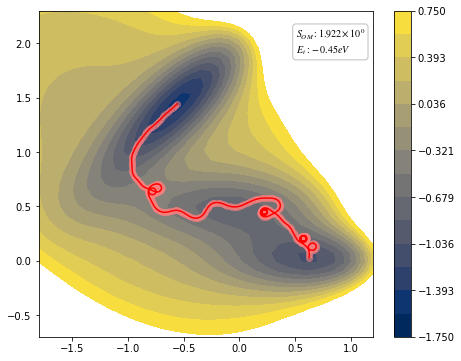

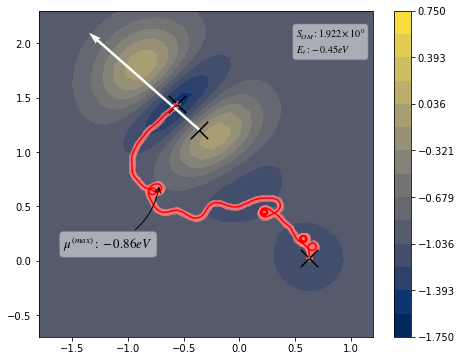

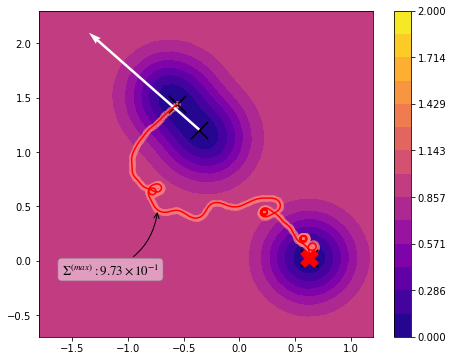

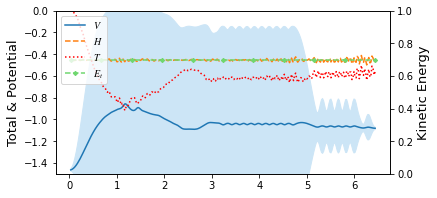

In [1]:
import numpy as np
from taps.paths import Paths
from taps.pathfinder import DAO
from taps.model import MullerBrown
from taps.coords import Coords
from taps.visualize import view
from taps.db.data import ImageData
from taps.projectors import Sine

N = 300
Nk = N - 210

x = np.linspace(-0.55822365, 0.6234994, N)
y = np.linspace(1.44172582, 0.02803776, N)

coords = Coords(coords=np.array([x, y]))
model = MullerBrown()
from taps.ml.gaussian import Gaussian
hyperparameters = {'sigma_f': 1, 'sigma_n^f': 1e-8, 'sigma_n^e':1e-6,
                   'l^2': 0.1}
hyperparameters_bounds = {'sigma_f': (1, 1), 'sigma_n^f': (1e-8, 1e-6), 'sigma_n^e':(1e-6, 1e-4), 'l^2': (1e-4, 4)}


model = Gaussian(real_model=model,
                 hyperparameters=hyperparameters,
                 hyperparameters_bounds=hyperparameters_bounds)
imgdata = ImageData("mullerbrown.db")



search_kwargs = {"method":"L-BFGS-B",
                  "options": {'disp': None,
                              'maxcor': 20,
                              'ftol': 2.220446049250313e-4,
                              'gtol': 1e-03,
                              'eps': 5e-6, 
                              'maxfun': 1000,
                              'maxiter': 1000,
                              'iprint': -1, 'maxls': 100,
                              'finite_diff_rel_step': 1e-6}}


prj = Sine(N=N, Nk=Nk, init=coords[:, 0].copy(), fin=coords[:, -1].copy())

finder = DAO(Et=-0.45, muE=1., tol=1e-2, gam=1.,
             action_name = ['Onsager Machlup', "Energy conservation"],
             prj_search=True, sin_search=False,
             search_kwargs=search_kwargs, 
             prj=prj)

paths = Paths(coords=coords, model=model, imgdata=imgdata, finder=finder)


In [ ]:
from taps.finder.gpao import GPAO
directory = "./mbgpao/"
finder = GPAO(real_finder=finder, label= directory + "gpao_1/1", phases=["auto et"])
paths.finder=finder
paths.search()

# Action-CSA with flatten potential, AuPassivation, alanine dipeptide

simpleperiodic 

In [4]:
auto_paths.get_velocity().shape

(2, 1, 299)